Testing out CNNs with the Fashion MNIST dataset

Start out with general setup - import things that need to be imported and get the dataset ready to use

In [1]:
#Importing tensorflow and keras
import tensorflow as tf
from tensorflow import keras

#Apparently these are helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing the Fashion MNIST set
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#As class labels aren't included by default, add them now
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
               'Sneaker', 'Bag', 'Ankle boot']

The dataset still needs some preprocessing before it can be used for CNN purposes, so do that now

In [3]:
#As all images have pixel values on a scale from 0-255, divide by 255.0 to scale between 0 and 1 and set as float
train_images = train_images / 255.0

test_images = test_images / 255.0

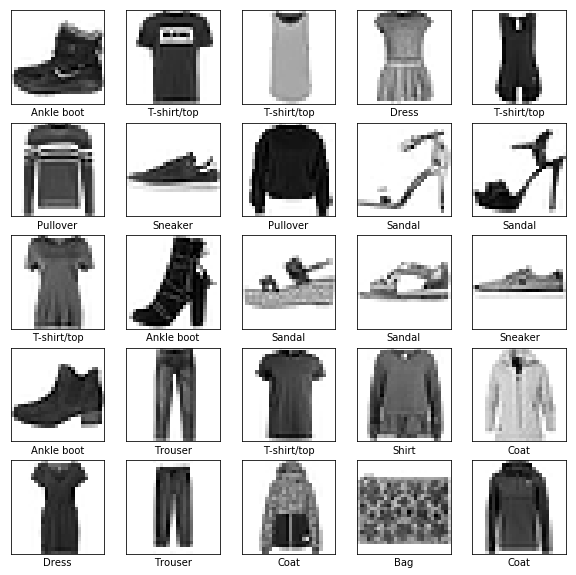

In [4]:
#If all of the above works, we should get the first 25 images with appropriate labels here
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

Assuming that everything to this point has been behaving, it's time to set up the CNN

In [5]:
#Setting up the model
#These the tutorial settings; they might be fiddled with later
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

#Here are the additional settings, which again are the default tutorial ones
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Now start training the model, fitting it to the training data

In [6]:
#Fitting, starting with tutorial's five epochs
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 9s 153us/step - loss: 0.4983 - acc: 0.8246
Epoch 2/5
60000/60000 [==============================] - 9s 156us/step - loss: 0.3764 - acc: 0.8638
Epoch 3/5
60000/60000 [==============================] - 9s 154us/step - loss: 0.3328 - acc: 0.8788
Epoch 4/5
60000/60000 [==============================] - 9s 146us/step - loss: 0.3103 - acc: 0.8860
Epoch 5/5
60000/60000 [==============================] - 9s 151us/step - loss: 0.2936 - acc: 0.8918


Now the model's been trained, try it on the test data

In [7]:
#Testing the accuracy on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 73us/step
Test accuracy: 0.8733


With that done, it's possible to make some predictions about what the classes for each item are

In [8]:
#Making predictions on the test data, which we know to be about 88% accurate
predictions = model.predict(test_images)

This section will plot the assigned probability of each label being the true label. If the predicted class matches the actual class, it's coloured blue; if it's not, it's coloured red.

In [9]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Now, just fill in the details for an image of your choice

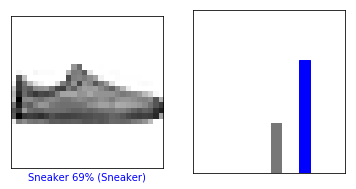

In [10]:
#i is the index of the item, while the rest here sets the plot up
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

Here's a nice grid with the first fifteen items and their label predictions

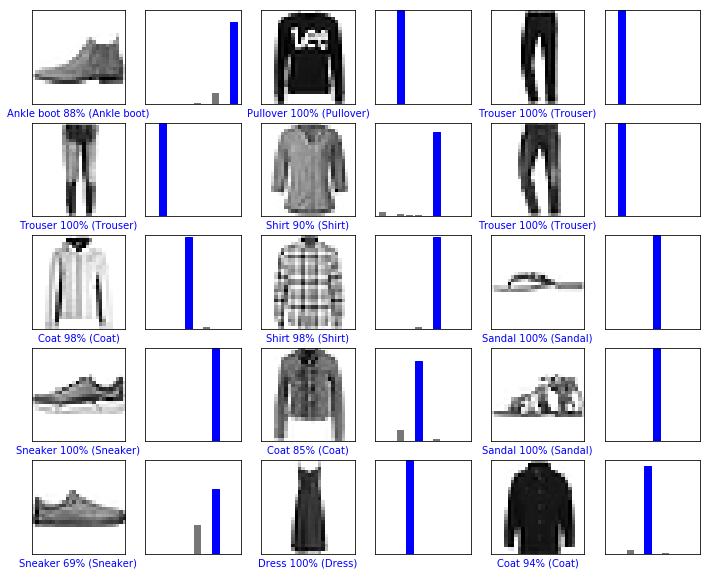

In [11]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


Whether or not it's gotten these right will vary based on the CNN instance. The first time I ran this, all of these were correct, which wasn't the case in the tutorial. Reinitialising it eventually got it to give a wrong answer in the first fifteen, although (as expected) it was wrong in a different way.